In [1]:
import tweepy
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

consumer_key = "E94DFtes8j5myDibhj4sfs0NA"
consumer_secret = "f02atPbdvNHpaOyo5CzfKKDQidqY3JPdSDxTVEuL9Oi220RaZh"
access_token = "358155084-9hyegtGt2qSXTw3OYa5vOdR27Zx9BECK40Z1QWay"
access_token_secret = "qh8kdCttP4ciVAdYMU70NQmw9oFzapA6f5U3OCtgTg9W3"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [2]:
search_words = "jouska"
date_since = "2020-07-27"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search,
        q=new_search,
        lang="id",
        since=date_since).items(1000)

In [3]:
items = []
for tweet in tweets:
    item = []
    item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split()))
    items.append(item)
hasil = pd.DataFrame(data=items, columns=['tweet'])
hasil

,tweet
0,Dengan tidak adanya jouska membuat teman teman...
1,Daripada stress lebih baik ke lapangan denggun...
2,Sekarang yg dibahas malah nama CEO jouska yang...
3,satu per satu bangkenya ceo jouska kebongkar
4,Netijen selalu semangat utk menguliti Aakar ma...
...,...
995,tim bola apa jouska
996,Penjelasan yg sangat detail tentang Jouska Skr...
997,21 Merana Karena Drama Jouska Bersama Safir Se...
998,netijen cuma cari tempat komentar akun jouska ...


In [8]:
pos_list= open("D:/TELKOM UNIVERSITY/Course IT/SANBERCODE/DATA SCIENCE LANJUTAN/WEEK 2/kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("D:/TELKOM UNIVERSITY/Course IT/SANBERCODE/DATA SCIENCE LANJUTAN/WEEK 2/kata_negatif.txt","r")
neg_kata = neg_list.readlines()


for item in items:
    count_p = 0
    count_n = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in item[0]:
            count_p +=1
    for kata_neg in neg_kata:
        if kata_neg.strip() in item[0]:
            count_n +=1
#     print ("positif: "+str(count_p))
#     print ("negatif: "+str(count_n))



In [5]:
# totCount = count_p - count_n
# totCount

In [9]:
S = []
for item in items:
        count_p = 0
        count_n = 0
        for kata_pos in pos_kata:
            if kata_pos.strip() in item[0]:
                count_p +=1
        for kata_neg in neg_kata:
            if kata_neg.strip() in item[0]:
                count_n +=1
        S.append(count_p - count_n)
    
hasil["value"] = S
print ("Nilai rata-rata: "+str(np.mean(hasil["value"])))
print ("Standar deviasi: "+str(np.std(hasil["value"])))

Nilai rata-rata: -0.483
Standar deviasi: 1.5778818079944976


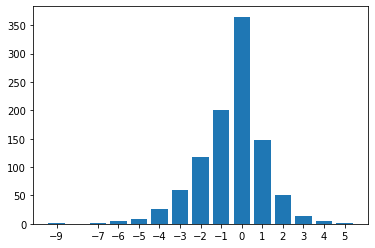

In [10]:
labels, counts = np.unique(hasil["value"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()